# CASE STUDY: IRIS PLANT CLASSIFICATION USING K-NEAREST NEIGHBORS





# STEP #0: PROBLEM STATEMENT

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. The attribute to be predicted is the class of iris plant. The classes are as follows: 1. Iris Setosa, 2. Iris Versicolour, 3. Iris Virginica

There are 4 features:
1. sepalLength: sepal length in cm
2. sepalWidth: sepal width in cm
3. petalLength: petal length in cm
4. petalWidth: petal width in cm

There are 3 classes represneting class label of iris flower {1,2,3}
1. Iris Setosa
2. Iris Versicolour
3. Iris Virginica




# STEP #1: IMPORTING DATA

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the iris dataset
data = pd.read_csv("Iris.csv")

# STEP #2: EXPLORING THE DATASET  

In [ ]:
# Let's view the head of the training dataset
# EXAMPLE

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Let's view the last elements in the training dataset
# EXAMPLE 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [10]:
data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


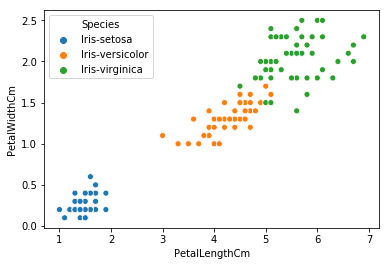

In [ ]:
# EXAMPLE

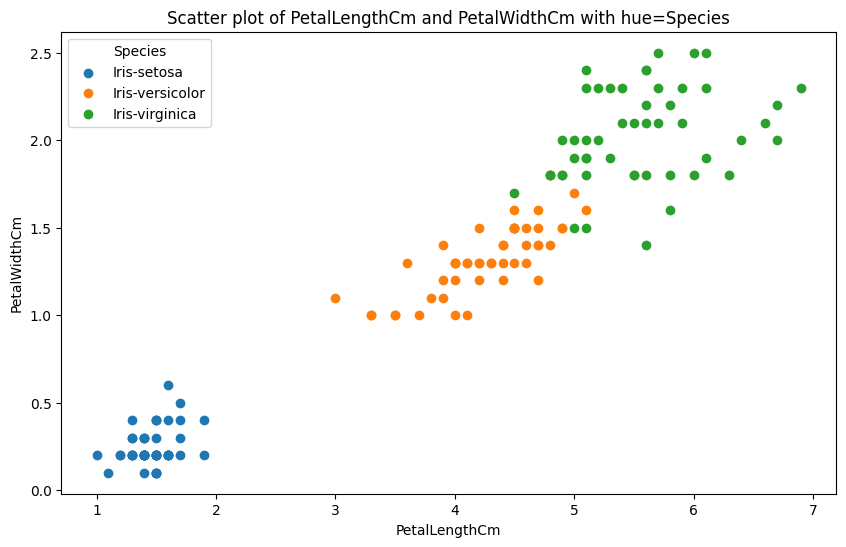

In [13]:
# Define the features for the x and y axes
x_feature = 'PetalLengthCm'
y_feature = 'PetalWidthCm'
# Define the hue (categorical variable for coloring)
hue = 'Species'
# Create a scatter plot
plt.figure(figsize=(10, 6))
for species in data[hue].unique():
    subset = data[data[hue] == species]
    plt.scatter(subset[x_feature], subset[y_feature], label=species)
# Add labels and a legend
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.legend(title=hue)
plt.title(f'Scatter plot of {x_feature} and {y_feature} with hue={hue}')
# Display the plot
plt.show()

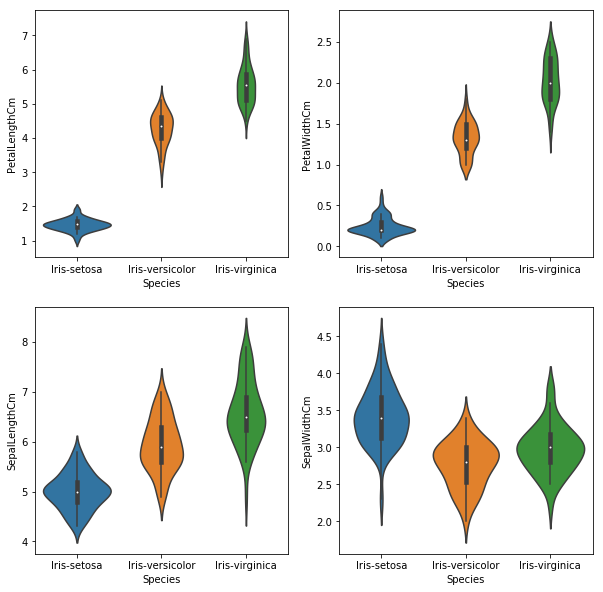

In [ ]:
# Let's show the Violin plot
# EXAMPLE

C:\Users\josec\Documents\ml2_knn_iris\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\josec\Documents\ml2_knn_iris\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\josec\Documents\ml2_knn_iris\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\josec\Documents\ml2_knn_iris\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

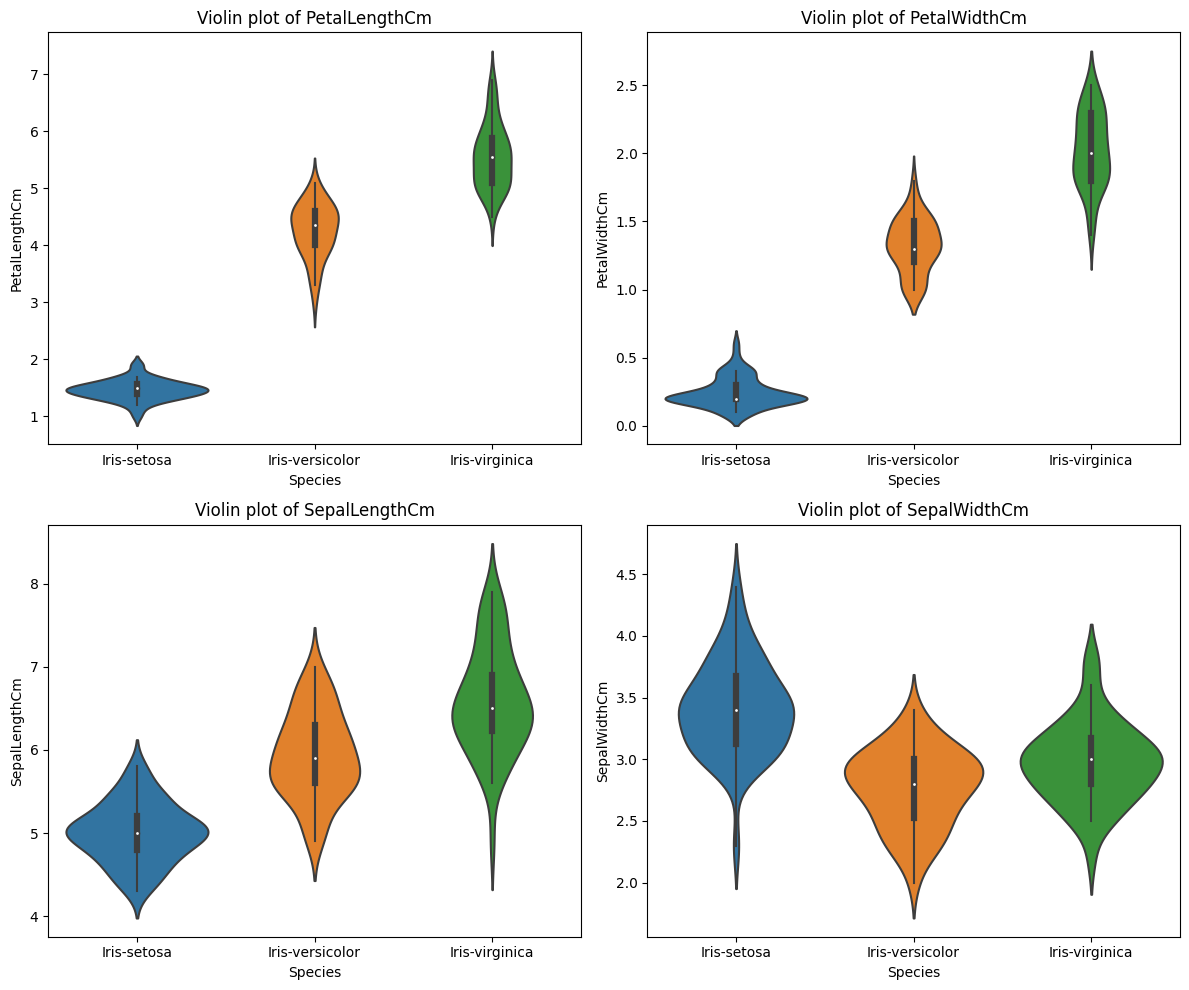

In [25]:
# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
# Flatten the axes array and iterate over it along with the feature names
for ax, feature in zip(axes.flatten(), sorted(
    data.drop(columns=['Species'], axis=1).columns.tolist()
)):
    # Create a violin plot on the current axes
    sns.violinplot(x='Species', y=feature, data=data, ax=ax)
    ax.set_title(f'Violin plot of {feature}')
# Adjust the layout
plt.tight_layout()
# Show the plots
plt.show()

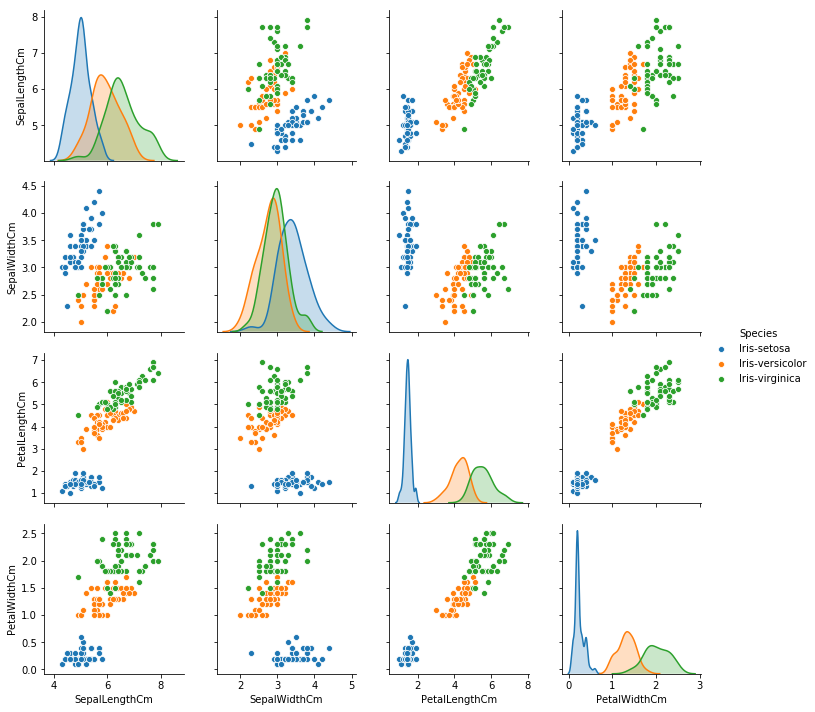

In [ ]:
# Let's try the Seaborn pairplot
# Example

C:\Users\josec\Documents\ml2_knn_iris\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\josec\Documents\ml2_knn_iris\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\josec\Documents\ml2_knn_iris\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\josec\Documents\ml2_knn_iris\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

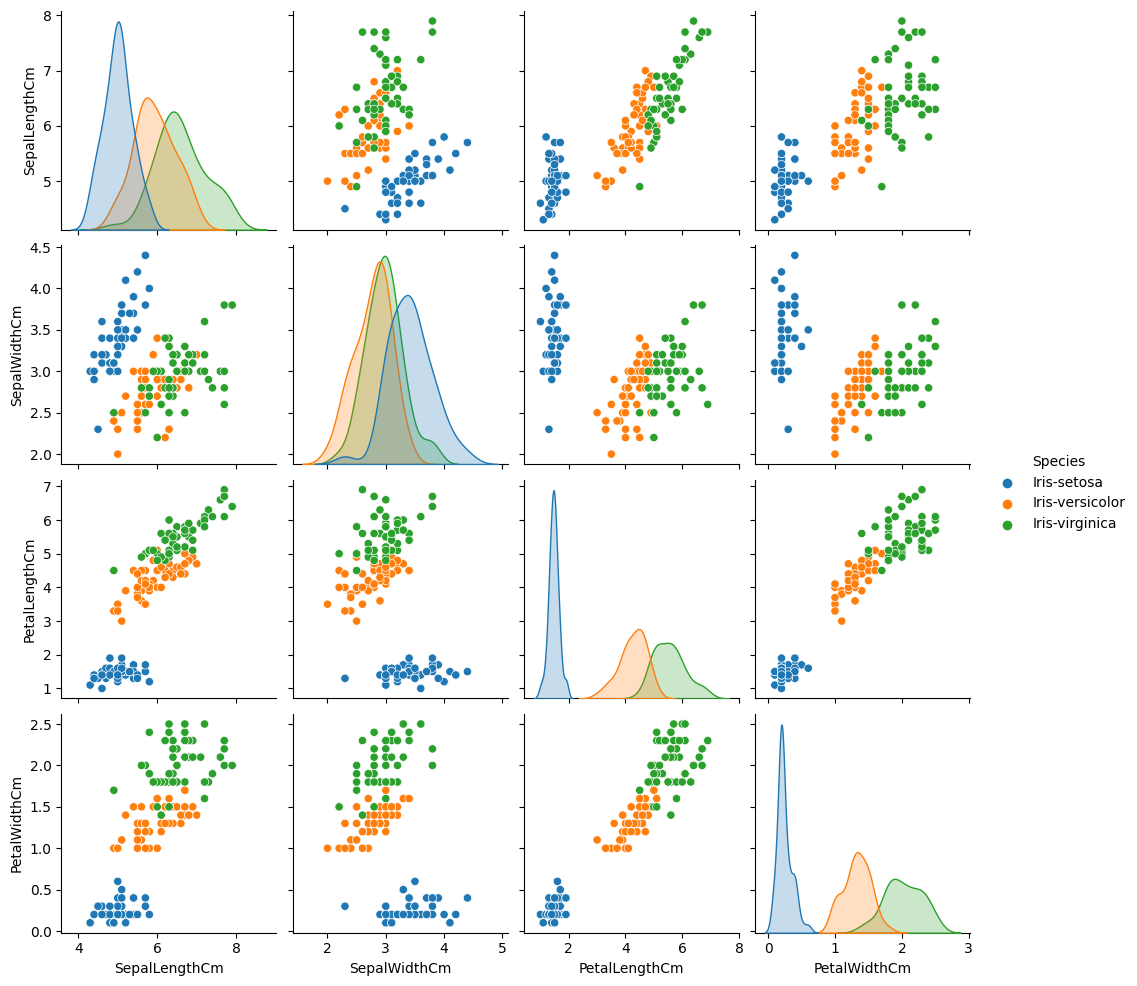

In [23]:
# Create a pair plot of the selected features colored by the target variable 'species'
sns.pairplot(data, hue='Species')
# Show the plot
plt.show()

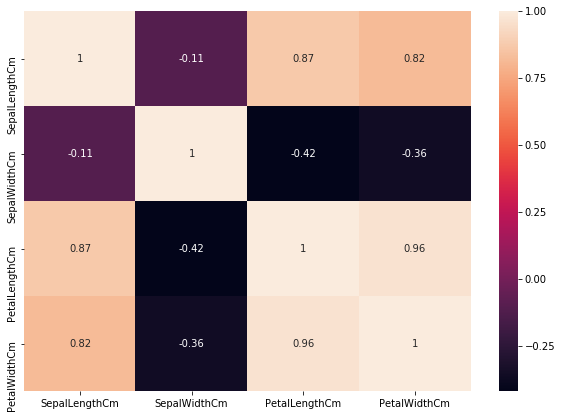

In [ ]:
# Let's check the correlation between the variables
# EXAMPLE

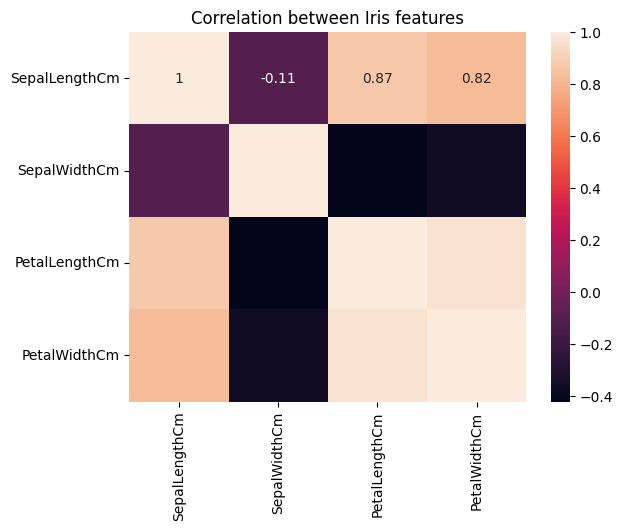

In [38]:
# Compute the correlation matrix for the selected features
corr_matrix = data.drop(columns=['Species'], axis=1).corr()

# Create a heatmap to visualize the correlation matrix
plt.figure()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation between Iris features')
plt.show()

# STEP #3: DATA CLEANING

In [ ]:
# Let's drop the ID and Species (target label) coloumns
# Example

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [41]:
X = data.drop(columns=["Species"], axis = 1)
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# Example

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10        Iris-setosa
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14        Iris-setosa
15        Iris-setosa
16        Iris-setosa
17        Iris-setosa
18        Iris-setosa
19        Iris-setosa
20        Iris-setosa
21        Iris-setosa
22        Iris-setosa
23        Iris-setosa
24        Iris-setosa
25        Iris-setosa
26        Iris-setosa
27        Iris-setosa
28        Iris-setosa
29        Iris-setosa
            ...      
120    Iris-virginica
121    Iris-virginica
122    Iris-virginica
123    Iris-virginica
124    Iris-virginica
125    Iris-virginica
126    Iris-virginica
127    Iris-virginica
128    Iris-virginica
129    Iris-virginica
130    Iris-virginica
131    Iris-virginica
132    Iris-virginica
133    Iris-virginica
134    Iri

In [42]:
y = data["Species"]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [60]:
# Import train_test_split from scikit library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35)

In [ ]:
# Example

(97, 4)

In [57]:
X_train.shape

(97, 4)

In [ ]:
# Example

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
106,4.9,2.5,4.5,1.7
94,5.6,2.7,4.2,1.3
14,5.8,4.0,1.2,0.2
60,5.0,2.0,3.5,1.0
49,5.0,3.3,1.4,0.2


In [61]:
X_train.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
41,4.5,2.3,1.3,0.3
3,4.6,3.1,1.5,0.2
92,5.8,2.6,4.0,1.2
147,6.5,3.0,5.2,2.0
84,5.4,3.0,4.5,1.5


# Scaling

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# STEP #4: TRAINING THE MODEL

In [ ]:
# Fitting K-NN to the Training set
# Example

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [66]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2, n_jobs= 1)
classifier.fit(X_train, y_train)
classifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

# STEP #5: EVALUATING THE MODEL

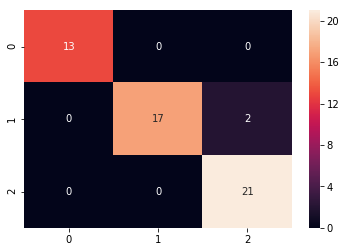

In [ ]:
# Example

In [73]:
X_test

array([[-0.18073627, -0.51662152,  0.7223172 ,  1.10773989],
       [ 0.71502962,  0.62749463,  1.3640428 ,  1.77513598],
       [ 2.50656141, -0.51662152,  1.77241364,  1.10773989],
       [ 0.58706307,  0.85631786,  1.01401065,  1.50817755],
       [ 1.22689585, -0.05897506,  0.78065589,  0.70730224],
       [-0.69260249,  0.85631786, -1.319537  , -1.29488601],
       [-0.05276971,  1.77161078, -1.14452092, -1.1614068 ],
       [-0.30870283, -0.97426798,  0.43062374,  0.03990616],
       [ 0.33112995, -1.8895609 ,  0.19726898, -0.22705228],
       [ 0.84299618,  0.3986714 ,  0.95567196,  1.50817755],
       [ 0.84299618,  0.16984817,  1.07234935,  0.84078146],
       [ 0.84299618,  0.3986714 ,  0.48896243,  0.44034381],
       [ 0.97096273, -0.05897506,  1.07234935,  0.84078146],
       [-1.07650216, -0.05897506, -1.319537  , -1.29488601],
       [-0.82056905,  0.62749463, -1.14452092, -0.89444836],
       [ 0.84299618, -0.28779829,  0.37228505,  0.17338537],
       [-0.94853561,  0.

<Axes: >

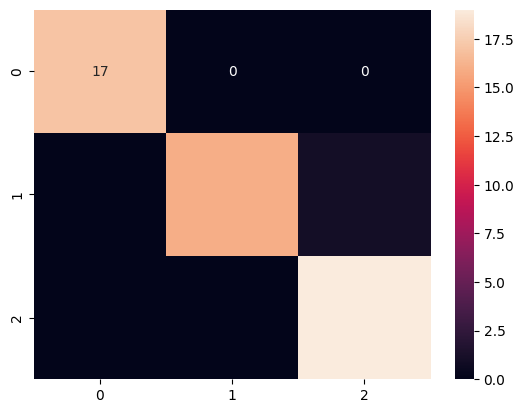

In [67]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
# Example

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.89      0.94        19
 Iris-virginica       0.91      1.00      0.95        21

    avg / total       0.97      0.96      0.96        53


In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.94      0.97        17
 Iris-virginica       0.95      1.00      0.97        19

       accuracy                           0.98        53
      macro avg       0.98      0.98      0.98        53
   weighted avg       0.98      0.98      0.98        53


# Saving Model

In [72]:
import pickle
filename = 'iris_model.sav'
pickle.dump(classifier,open(filename,'wb'))

In [76]:
X.columns.tolist()

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']